# From Classical Limits to Quantum Power: Deutsch’s Two-Qubit Solution

## Introduction

We can define a quantum algorithm as a sequence of quantum operations applied in a particular order to solve problems by harnessing the unique principles of quantum mechanics. Unlike classical algorithms that use bits—restricted to values of either 0 or 1—quantum algorithms use qubits, which can exist in a superposition of both states simultaneously. This allows quantum systems to process multiple possibilities in parallel, offering potential advantages over classical approaches.

In this chapter, we will explore one of the simplest examples of a quantum algorithm that highlights how quantum computing can outperform classical methods: the *Deutsch algorithm*. While it doesn’t have direct practical applications, it serves as a foundational example for understanding how quantum features like superposition and interference can be leveraged to solve problems more efficiently. The Deutsch algorithm is often used as an entry point into quantum computing, illustrating the fundamental principles that power more complex quantum algorithms.

## Deutsch Problem

### Problem Statement

Deutsch’s problem is one of the simplest examples in quantum computing that highlights how quantum algorithms can outperform classical ones. Though it involves a very basic setup, it introduces key concepts like quantum parallelism and interference, which are foundational to many quantum algorithms.

Imagine you have a mysterious function  $f(x)$  that takes a single bit  $x$  as input. Since the input is just one bit, it can be either  $0$  or  $1$ . The function  $f(x)$  produces an output of either  $0$  or  $1$  for each input provided. However, the internal mechanism of the function remains unknown to you. You can only interact with it by querying—that is, by supplying an input and observing the corresponding output.

In many contexts, such a function is referred to as an *oracle*. An oracle is essentially a black-box (function or subroutine) that provides specific information about its behavior without disclosing its internal workings. It serves as a tool that the system can query to gain insights or verify certain conditions.
For simplicity, we will continue using the term function in this context

You are told that the function is either *constant* or *balanced*. A constant function means that it gives the same output for both inputs, i.e. $f(0) = f(1)$. A balanced funtion means that it gives different outputs for the two inputs, i.e. $f(0) \neq f(1)$.

The goal is to *determine whether the function is constant or balanced with the least number of queries*.

Using classical computers, to be sure whether the function is constant or balanced, you must check both inputs. You must load $0$ as the input and record $f(0)$ and separately, load $x=1$ and evaluate $f(1)$.
Only by seeing both results you can confidently determine if the function is *constant* or *balanced*. Therefore, minimum number of queries required for classical computers is two. 
Deutsch's algorithm is supposed to outperform classical counterpart. This means that using Desutsch's solution implemented in a quantum circuit, one can determine whethere $f(x)$ is constant or balanced with only **one query**.

### Set up

Before we start with the solution using quantum algorithms, we briefly explain how to set up an algorithm. 
At its core, a quantum algorithm follows these basic steps:
- **Initialize qubits**: Start with qubits in a known state (usually $\ket{0}$ for all qubits). If you need $\ket{1}$ for certain qubits, use $X$ to flip the initial state.
- **Create Superposition**: Apply gates such as the Hadamard gate $H$ to place qubits into superposition, allowing the algorithm to explore multiple possibilities simultaneously. Whether this step is applied depends on the specific problem being addressed. In some cases, certain problems may bypass this step entirely.
- **Apply Quantum Operations**: Use a sequence of quantum gates (like $X$, $H$, or $C_{10}$) to manipulate the qubits and encode the problem into their states.
- **Leverage Quantum Phenomena**: Quantum algorithms exploit principles like interference (where certain paths reinforce or cancel each other) and entanglement (where qubits become correlated) to guide the system toward the correct solution.
- **Measure the Qubits**: Finally, measure the qubits to collapse them into classical bits. The outcome reveals the solution or helps in approximating it.


### Deutsch Algorithm

Now let's start with Deutsch's solution. In this section we will focus on the solution with only two qubits but the solution is extendible easily to a system with mutiple qubits. Moreover, we try to associate the solution to the steps we have proposed above. 

1. **Initialize qubits**: The algorithm uses two qubits:
- qubit 1 ( $\ket{x}$ ): The input qubit (initially set to  $\ket{0}$ )
- qubit 2 ( $\ket{y}$ ): An auxiliary qubit (initially set to $\ket{1}$ ). We will load $y$ with $\ket{0}$ and then we will apply $X \ket{y}$.

After this step the initial state of the whole system is: $\ket{x}\ket{y} = \ket{0}\ket{1} = \ket{01}$

2. **Create Superpositions**: Applying a Hadamard gate $H$ to each qubit separately will result in:

- $H\ket{0} = \frac{1}{\sqrt 2}(\ket{0} + \ket{1})$ , for $\ket{x}$
- $H\ket{1} = \frac{1}{\sqrt 2}(\ket{0} - \ket{1})$ , for $\ket{y}$, after applying $X$.

In order to see what is the state of the whole system, we can apply two $H$s to $\ket{xy}$ which will result in:
$
HH\ket{xy} = HH\ket{01} = (H\ket{0})(H\ket{1}) = \frac{1}{2}(\ket{00}-\ket{01}+\ket{10}-\ket{11})
$

The system is now in a superposition of all possible inputs.

3. **Apply Quantum Operations**: In our context here, the quantum operation of our interest is the function $f(x)$. Let's assume that the function $f$ on input $\ket{x}$ is applicable through a unitary transformation (matrix) represented as $U_f$. Applying $U_f$ on our two qubit system will result in:

$
U_f\ket{x}\ket{y} = \ket{x}\ket{y \oplus f(x)}
$

Remember that in our setup $y$ is the auxiliary qubit to store the output. The qubit $\ket{y}$ is used to store the result of $f(x)$ in a way that maintains the reversibility required in quantum computing. The state $\ket{y \oplus f(x)}$ represents that applying $f(x)$ flips the state of the auxiliary qubit $\ket{y}$ if and only if $f(x)=1$. 

Let's apply $U_f$ to our prepared state:

$
U_f (\frac{1}{2}(\ket{00}-\ket{01}+\ket{10}-\ket{11})) = 
\frac{1}{2} (U_f \ket{00} - U_f \ket{01} + U_f \ket{10} - U_f \ket{11}) =
\frac{1}{2} (U_f \ket{0}\ket{f(0)} - U_f \ket{0}\ket{1 \oplus f(0)} + U_f \ket{1}\ket{f(1)} - U_f \ket{1}\ket{1 \oplus f(1)})
$

The final result after applying $\oplus$ will be:

$
\frac{1}{2} (\ket{0}\ket{f(0)} - \ket{0}\ket{\neg f(0)} + \ket{1}\ket{f(1)} - \ket{1}\ket{\neg f(1)})
$

4. **Leverage Quantum Phenomena**: We need to evaluate and symplify the final state. Let’s look at two possible cases:

Case 1: $f(x)$ is constant. This means $f(0)=f(1)$ and $\neg f(0) = \neg f(1)$. In this case our state will be:

- $f(0)=0 : \frac{1}{2} (\ket{0}\ket{0} - \ket{0}\ket{1} + \ket{1}\ket{0} - \ket{1}\ket{1}) $ This is the superposition of $\ket{01}$.
- $f(0)=1 : \frac{1}{2} (\ket{0}\ket{1} - \ket{0}\ket{0} + \ket{1}\ket{1} - \ket{1}\ket{0}) $ This is the superposition of $-\ket{01}$.
 
Case 2: $f(x)$ is balanced. This means $f(0) \neq f(1)$ or $f(0) = \neg f(1)$, $f(1) = \neg f(0)$. In this case our state will be:

- $f(0)=0 : \frac{1}{2} (\ket{0}\ket{0} - \ket{0}\ket{1} + \ket{1}\ket{1} - \ket{1}\ket{0}) $ This is the superposition of $\ket{11}$.
- $f(0)=1 : \frac{1}{2} (\ket{0}\ket{1} - \ket{0}\ket{0} + \ket{1}\ket{0} - \ket{1}\ket{1}) $ This is the superposition of $-\ket{11}$.

The evaluation is revealing something interesting. When the function $f(x)$ is constant the whole system is in a superposition that can be factored based on two qubits $\ket{01}$. Similarly when $f(x)$ is balanced the whole system is in a superposition that can be writen as $\ket{11}$. This means that the value of $\ket{x}$ can reveal some information about $f(x)$. We can apply another $H$ to each qubit to evaluate the final value. We apply another two $H$'s to prepare the qubits for measurements.

Case 1: $f(x)$ is constant.

- $f(0)=0 : HH(\frac{1}{2} (\ket{0}\ket{0} - \ket{0}\ket{1} + \ket{1}\ket{0} - \ket{1}\ket{1})) = \ket{01}$
- $f(0)=1 : HH(\frac{1}{2} (\ket{0}\ket{1} - \ket{0}\ket{0} + \ket{1}\ket{1} - \ket{1}\ket{0})) = -\ket{01}$.
 
Case 2: $f(x)$ is balanced. This means $f(0) \neq f(1)$ or $f(0) = \neg f(1)$, $f(1) = \neg f(0)$. In this case our state will be:

- $f(0)=0 : HH(\frac{1}{2} (\ket{0}\ket{0} - \ket{0}\ket{1} + \ket{1}\ket{1} - \ket{1}\ket{0})) = \ket{11} $.
- $f(0)=1 : HH(\frac{1}{2} (\ket{0}\ket{1} - \ket{0}\ket{0} + \ket{1}\ket{0} - \ket{1}\ket{1})) = -\ket{11} $.

5. **Measure the Qubits**: In this step, the values of $ \ket{x} $ and $ \ket{y} $ can be measured. In the Deutsch problem, the negative signs in terms like $ -\ket{01} $ and $ -\ket{11} $ can be disregarded, as they have no effect on the measurement outcomes. Additionally, $ \ket{y} $ consistently collapses to $ \ket{1} $ in all cases, providing no useful information for determining the nature of $ f(x) $. Therefore, the focus shifts solely to the value of $ \ket{x} $, which reveals whether $ f(x) $ is constant or balanced.

#### The algorithm

What we have described in dtail so far about Deutsch algorithm, can be summarzied and rewritten as:

$
HH(U_f(HH(\ket{x}(X\ket{y}))))
$ , given both qubits are initialized with $\ket{0}$

## Program

In this section we will implement the Deutsch algorithm in qiskit. First, we will implement the solution studied above with only two qubits. Later a complete code with multiple qubits will be provided. 
Before, implementing the full algorithm, we need to practice how to implement the oracle (or the function $f(x)$). There are four possible functions that can be used to implement the oracle:

$f(0)$ | $f(1)$ | type
----|---- | ---
$0$ | $0$ | constant
$0$ | $1$ | balanced
$1$ | $0$ | balanced
$1$ | $1$ | constant

The functions implemented below provides four possible circuits:

In [45]:
from qiskit import QuantumCircuit

def oracle_00(circuit):     #implements function f(0)=0 and f(1)=0
    return

def oracle_01(circuit):     #implements function f(0)=0 and f(1)=1
    circuit.cx(0,1)
    return

def oracle_10(circuit):     #implements function f(0)=1 and f(1)=0
    circuit.x(1)
    circuit.cx(0,1)
    return

def oracle_11(circuit):     #implements function f(0)=1 and f(1)=1
    circuit.x(1)
    return

oracles = [oracle_00 , oracle_01 , oracle_10 , oracle_11]

for orc in oracles:
    qc = QuantumCircuit(2,0) # Initialize qubits: 2 qubits and 2 classical bits
    qc.barrier() # Start of the Oracle: The barrier only separates the start / end of the oracle (subroutine) from the rest of the algorithm
    orc(qc)
    qc.barrier() # End of the Oracle: The barrier only separates the start / end of the oracle (subroutine) from the rest of the algorithm
    print(orc.__name__)
    print(qc)
    print('---------------------------')

oracle_00
      ░  ░ 
q_0: ─░──░─
      ░  ░ 
q_1: ─░──░─
      ░  ░ 
---------------------------
oracle_01
      ░       ░ 
q_0: ─░───■───░─
      ░ ┌─┴─┐ ░ 
q_1: ─░─┤ X ├─░─
      ░ └───┘ ░ 
---------------------------
oracle_10
      ░            ░ 
q_0: ─░────────■───░─
      ░ ┌───┐┌─┴─┐ ░ 
q_1: ─░─┤ X ├┤ X ├─░─
      ░ └───┘└───┘ ░ 
---------------------------
oracle_11
      ░       ░ 
q_0: ─░───────░─
      ░ ┌───┐ ░ 
q_1: ─░─┤ X ├─░─
      ░ └───┘ ░ 
---------------------------


In [40]:
from qiskit import transpile
from qiskit_aer import AerSimulator

def Deutsch_Circuit(deutch_qc, oracle):
    deutch_qc.x(1) # The auxiliary bit (y) must be set to 1.
    deutch_qc.h(0) # input in superposition
    deutch_qc.h(1) # auxiliary in superposition
    deutch_qc.barrier()
    oracle(deutch_qc) # query oracle
    deutch_qc.barrier()
    deutch_qc.h(0) # transform input into basis state
    deutch_qc.h(1) # transform auxiliary into basis state
    deutch_qc.measure(0, 0)  # Measure qubit 0 and store in classical bit 0
    deutch_qc.measure(1, 1)  # Measure qubit 1 and store in classical bit 1


def Deutch_Run(circuit):
    simulator = AerSimulator()
    compiled_circuit = transpile(circuit, simulator)
    result = simulator.run(compiled_circuit, shots=1024).result()
    return result

Measurement results: {'10': 1024}


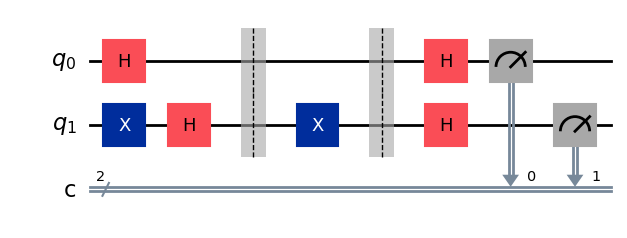

In [49]:
# Experiment 1: Constant function

qc = QuantumCircuit(2,2)
Deutsch_Circuit(qc,oracle_11)
result = Deutch_Run(qc)

# Get the counts (frequency of measurement outcomes)
counts = result.get_counts()
# Print the measurement results
print("Measurement results:", counts)
qc.draw("mpl")  

Measurement results: {'11': 1024}


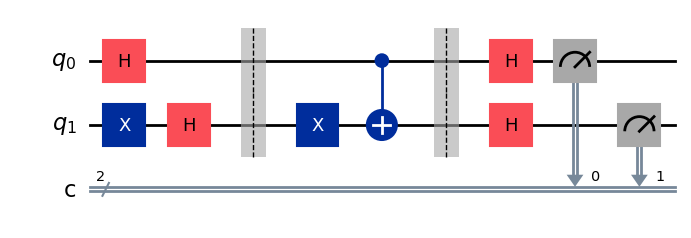

In [44]:
# Experiment 2: Balanced function

qc = QuantumCircuit(2,2)
Deutsch_Circuit(qc,oracle_10)
result = Deutch_Run(qc)

# Get the counts (frequency of measurement outcomes)
counts = result.get_counts()
# Print the measurement results
print("Measurement results:", counts)
qc.draw("mpl") 

### [In progress]

The rest is not complete yet. Under development...

The following sections will cover :
- general case for the algorithm
- concepts like quantum parallelism


oracle number: Balanced 2 0b10
Prediction:
Balanced


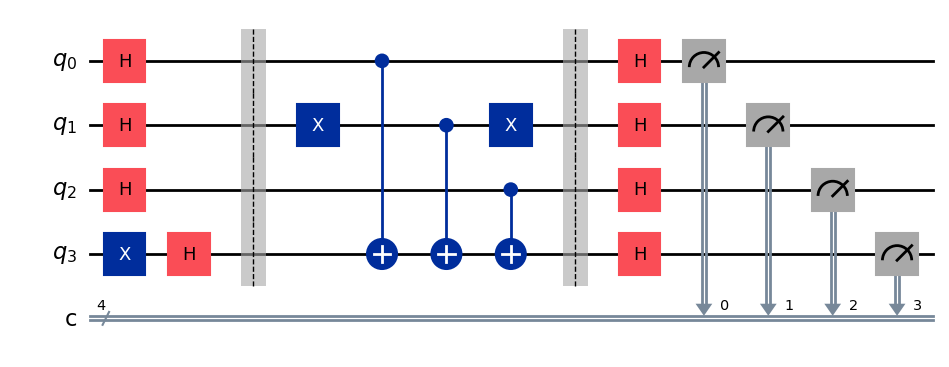

In [1]:
import qiskit
import matplotlib as mpl
from random import choice, randint

class QCDeutschJozsaOracle:
    def __init__(self) -> None:
        self.register_inp_size = 3 # the size of input, we assume the input is a number with 3-bits
        self.register_out_size = 1 # the size of the auxiliary (output) qbit
        self.register_size = self.register_inp_size + self.register_out_size
        self.dj_circuit = None

    def dj_oracle(self,n)->str:     #begin our function
        type = 'Balanced' #choice(['Constant0','Constant1','Balanced'])
        if type == 'Balanced':
            oracle_num = randint(0,(2**n)-1)    #random binary num between
            print('oracle number:',type, oracle_num , str(bin(oracle_num)))
        elif type == 'Constant0':
                print('todo: constant0')
        elif type == 'Constant1':
                print('todo:contant1')
        oracle_num_bin = format(oracle_num , '0'+str(n)+'b')
        for reg in range(0,len(oracle_num_bin)):   #iterate through flipGates
            if oracle_num_bin[reg] == '1':
                self.dj_circuit.x(reg)     #flip qubit if necessary
        for reg in range(0,n):    #CX Gate controlled on every query qubit
            self.dj_circuit.cx(reg,n)   #and targeting auxiliary qubit
        for reg in range(0,len(oracle_num_bin)):   #unflip qubits so output
            if oracle_num_bin[reg] == '1':         #reveals nothing except
                self.dj_circuit.x(reg)                #what the original input was

        return type    

    def simulate(self)->None:
        from qiskit_aer import AerSimulator

        simulator = AerSimulator()
        job = simulator.run(self.dj_circuit,shots=1,memory=True)
        result = job.result()
        measurements = result.get_memory()[0]   #e.g '0000'
        query_state = measurements[-1] #gets the last element in the array
        print('Prediction:')
        if query_state == '1':
            print('Balanced')
        else:    #Constant Query
            print('Constant')
     

    def construct_circuit(self)->None:
        self.dj_circuit = qiskit.QuantumCircuit(self.register_size,self.register_size) # create Deutsch-Jozsa circuit

        for line in range(0,self.register_inp_size):
            self.dj_circuit.h(line)
        self.dj_circuit.x(self.register_inp_size)    #flip Auxiliary
        self.dj_circuit.h(self.register_inp_size)    #put into |-> state

        self.dj_circuit.barrier()
        oracle_type = self.dj_oracle(3)
        self.dj_circuit.barrier()

        #after Oracle function
        for line in range(0,self.register_size):
            self.dj_circuit.h(line)    #apply Hadamard to each qubit
            self.dj_circuit.measure(line,line)    #measure qubit onto respective bit
        
    def run_oracle(self):
        self.construct_circuit()
        self.simulate() # error
        

oracle = QCDeutschJozsaOracle()
oracle.run_oracle()
oracle.dj_circuit.draw('mpl')


## Summary

[todo]